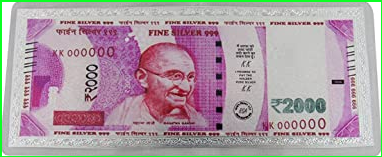

[[[ 36 255  12]
  [ 36 255  12]
  [ 36 255  12]
  ...
  [ 36 255  12]
  [ 36 255  12]
  [ 36 255  12]]

 [[ 36 255  12]
  [ 36 255  12]
  [ 36 255  12]
  ...
  [ 36 255  12]
  [ 36 255  12]
  [ 36 255  12]]

 [[ 36 255  12]
  [ 36 255  12]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [ 36 255  12]]

 ...

 [[ 36 255  12]
  [ 36 255  12]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [ 36 255  12]]

 [[ 36 255  12]
  [ 36 255  12]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [ 36 255  12]]

 [[ 36 255  12]
  [ 36 255  12]
  [ 36 255  12]
  ...
  [ 36 255  12]
  [ 36 255  12]
  [ 36 255  12]]]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
image = cv2.imread('/content/drive/MyDrive/Tejas Workarea/sample.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
canny = cv2.Canny(blurred, 120, 255, 1)

# Find contours
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#cnts
count = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    roi_gray = image[y:y+h,x:x+w]
    if(w>=200 and x>=100):
      break
#cv2_imshow(canny)
#cv2_imshow( image)
cv2_imshow( roi_gray)
print(roi_gray)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


True

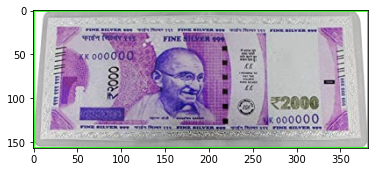

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

## Display image
import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow (roi_gray) ## Because it is BGR format, the color is strange but can be displayed
## Save image0
cv2.imwrite ('/content/drive/My Drive/sample_output.jpg', roi_gray)

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/Tejas Workarea/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

image = Image.open('/content/drive/My Drive/sample_output.jpg')
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
# Normalizing the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Loading image into the array
data[0] = normalized_image_array

prediction = model.predict(data)
print(prediction)


[[0.06036841 0.05248243 0.02404759 0.02809274 0.02527654 0.01802703
  0.79170525]]


In [ ]:
labels = ['10','20','50','100','200','500','2000']
max(prediction[0])
labels[list(prediction[0]).index(max(list(prediction[0])))]

'2000'